In [2]:
import pandas as pd
from datetime import datetime, timedelta, date
from IPython import display

In [3]:
df = pd.DataFrame(columns = ['player_id', 'wordle_id', 'won_on_try_num', 'total_num_tries', 'created_date'])

In [4]:
df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 5, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : 4, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)

df = df.append({'player_id':"travis",
                'wordle_id':201, 
                'won_on_try_num' : None, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"travis",
                'wordle_id':202, 
                'won_on_try_num' : 5, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"1ravis",
                'wordle_id':201, 
                'won_on_try_num' : 2, 
                'total_num_tries' : 6,
                'created_date': datetime.now()}, 
                ignore_index = True)
df = df.append({'player_id':"2ravis",
                'wordle_id':201, 
                'won_on_try_num' : None, 
                'total_num_tries' : 6,
                'created_date': datetime.now() }, 
                ignore_index = True)

In [5]:
reset = df
reset

,player_id,wordle_id,won_on_try_num,total_num_tries,created_date
0,travis,201,5,6,2022-02-19 19:45:29.541919
1,travis,201,4,6,2022-02-19 19:45:29.545783
2,travis,201,4,6,2022-02-19 19:45:29.548875
3,travis,201,4,6,2022-02-19 19:45:29.552013
4,travis,201,None,6,2022-02-19 19:45:29.554756
5,travis,202,5,6,2022-02-19 19:45:29.557853
6,1ravis,201,2,6,2022-02-19 19:45:29.560690
7,2ravis,201,None,6,2022-02-19 19:45:29.563780


In [34]:
df = pd.read_csv('src/tests/res/stubbed_messages.csv', parse_dates=['created_date'])

<AxesSubplot:xlabel='created_date'>

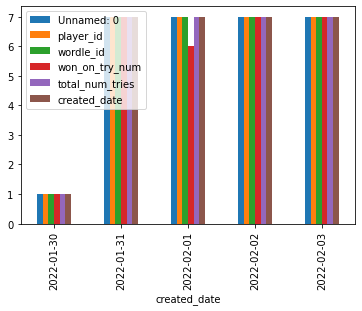

In [35]:
df.groupby([df['created_date'].dt.date]).count().plot(kind='bar')

<AxesSubplot:>

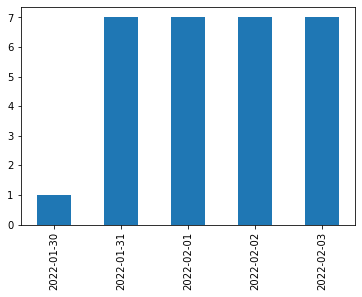

In [40]:
df['created_date'].dt.date.value_counts().sort_index().plot(kind='bar')